# Just for Understanding some concept not used ----- main is crop  recomendation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_path = '../Processed_Data/crop_recommendation.csv'
df = pd.read_csv(df_path)
df

,Unnamed: 0,temperature,humidity,ph,rainfall,label,Nitrogen,Phosphorus,Potassium
0,0,20.879744,82.002744,6.502985,202.935536,rice,70,58,36
1,1,21.770462,80.319644,7.038096,226.655537,rice,73,51,42
2,2,23.004459,82.320763,7.840207,263.964248,rice,69,48,40
3,3,26.491096,80.158363,6.980401,242.864034,rice,91,36,42
4,4,20.130175,81.604873,7.628473,262.717340,rice,71,48,44
...,...,...,...,...,...,...,...,...,...
1895,1895,25.287846,89.636679,6.765095,58.286977,watermelon,106,7,49
1896,1896,26.638386,84.695469,6.189214,48.324286,watermelon,108,22,52
1897,1897,25.331045,84.305338,6.904242,41.532187,watermelon,81,23,46
1898,1898,26.897502,83.892415,6.463271,43.971937,watermelon,108,6,54


In [3]:
del df['Unnamed: 0']
df.rename(columns={'label':'Crop'},inplace=True)  #rename the column name from laebl to Crop

In [4]:
df.head()

,temperature,humidity,ph,rainfall,Crop,Nitrogen,Phosphorus,Potassium
0,20.879744,82.002744,6.502985,202.935536,rice,70,58,36
1,21.770462,80.319644,7.038096,226.655537,rice,73,51,42
2,23.004459,82.320763,7.840207,263.964248,rice,69,48,40
3,26.491096,80.158363,6.980401,242.864034,rice,91,36,42
4,20.130175,81.604873,7.628473,262.717340,rice,71,48,44


In [5]:
df.shape

(1900, 8)

In [6]:
df.size

15200

In [7]:
df['Crop'].unique()

array(['rice', 'mungbean', 'maize', 'jute', 'coffee', 'cotton',
       'kidneybeans', 'coconut', 'blackgram', 'pigeonpeas', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [8]:
df.describe()

,temperature,humidity,ph,rainfall,Nitrogen,Phosphorus,Potassium
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,25.893713,75.672290,6.380658,110.487500,54.314737,51.909474,49.588947
std,5.089710,19.394038,0.631001,55.541933,38.743848,34.754813,53.112318
min,8.825675,18.092240,4.507524,20.211267,0.000000,5.000000,5.000000
25%,23.114310,65.343225,5.933683,69.284008,21.000000,25.000000,21.000000
50%,25.721405,82.179794,6.375295,103.042202,40.000000,47.000000,33.500000
75%,28.656138,90.723953,6.807626,141.137227,90.000000,66.000000,48.000000
max,43.675493,99.981876,7.995849,298.560117,140.000000,145.000000,205.000000


In [9]:
df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
Nitrogen         int64
Phosphorus       int64
Potassium        int64
dtype: object

In [10]:
df['Crop'].value_counts()

Crop
rice           100
banana         100
pomegranate    100
papaya         100
orange         100
muskmelon      100
mango          100
apple          100
grapes         100
pigeonpeas     100
mungbean       100
blackgram      100
coconut        100
kidneybeans    100
cotton         100
coffee         100
jute           100
maize          100
watermelon     100
Name: count, dtype: int64

In [11]:
df1=df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).astype(float)

In [12]:
df1.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Nitrogen       float64
Phosphorus     float64
Potassium      float64
dtype: object

In [13]:

df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
Crop            object
Nitrogen       float64
Phosphorus     float64
Potassium      float64
dtype: object

<Axes: >

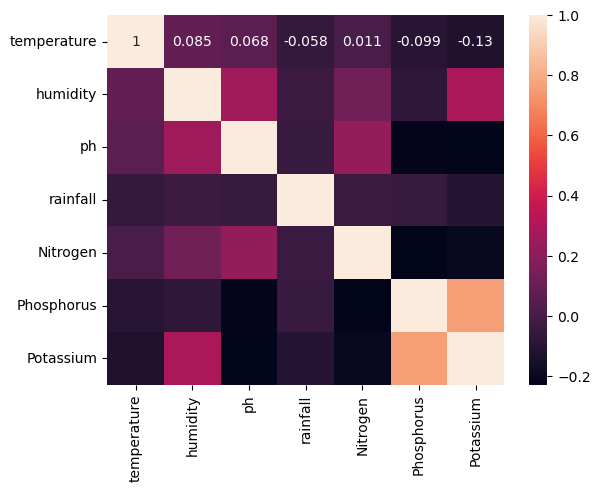

In [14]:
sns.heatmap(df1.corr(),annot=True)

# Seperating the features and target label from dataset


Take a target value and seperating value that is independent value and dependent value for train test and regression and model trainin

In [15]:
#independent variable
crop_features = df[['Nitrogen','Phosphorus','Potassium','temperature','humidity','ph','rainfall']] 

#independent variaable
crop=df['Crop']

In [16]:
#initialize two empty list to append all model's name and crossponding name

acc=[]
model_name=[]


# Creating dummies variable

to perform we need to convert categorical data into numerical data 

In [17]:
# Create dummy variables for the Crop column
df_encoded = pd.get_dummies(df, columns=['Crop'])


In [18]:
# Convert only boolean columns to integer
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [19]:
df_encoded
# 


,temperature,humidity,ph,rainfall,Nitrogen,Phosphorus,Potassium,Crop_apple,Crop_banana,Crop_blackgram,...,Crop_maize,Crop_mango,Crop_mungbean,Crop_muskmelon,Crop_orange,Crop_papaya,Crop_pigeonpeas,Crop_pomegranate,Crop_rice,Crop_watermelon
0,20.879744,82.002744,6.502985,202.935536,70.0,58.0,36.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21.770462,80.319644,7.038096,226.655537,73.0,51.0,42.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,23.004459,82.320763,7.840207,263.964248,69.0,48.0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,26.491096,80.158363,6.980401,242.864034,91.0,36.0,42.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20.130175,81.604873,7.628473,262.717340,71.0,48.0,44.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,25.287846,89.636679,6.765095,58.286977,106.0,7.0,49.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1896,26.638386,84.695469,6.189214,48.324286,108.0,22.0,52.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1897,25.331045,84.305338,6.904242,41.532187,81.0,23.0,46.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1898,26.897502,83.892415,6.463271,43.971937,108.0,6.0,54.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_encoded.dtypes

temperature         float64
humidity            float64
ph                  float64
rainfall            float64
Nitrogen            float64
Phosphorus          float64
Potassium           float64
Crop_apple            int32
Crop_banana           int32
Crop_blackgram        int32
Crop_coconut          int32
Crop_coffee           int32
Crop_cotton           int32
Crop_grapes           int32
Crop_jute             int32
Crop_kidneybeans      int32
Crop_maize            int32
Crop_mango            int32
Crop_mungbean         int32
Crop_muskmelon        int32
Crop_orange           int32
Crop_papaya           int32
Crop_pigeonpeas       int32
Crop_pomegranate      int32
Crop_rice             int32
Crop_watermelon       int32
dtype: object

# Train_test_Split

In [21]:
from sklearn.model_selection import  train_test_split

In [22]:
# Independent variables (X) - all columns except the Crop columns
x = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('Crop_')])


In [23]:
# Dependent variable (y) - all Crop columns (dummy variables)
y = df_encoded[[col for col in df_encoded.columns if col.startswith('Crop_')]]

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1520, 7)
X_test shape: (380, 7)
Y_train shape: (1520, 19)
Y_test shape: (380, 19)


# Logistic Regression

MultiOutputClassifier: This allows logistic regression to be applied to each target label separately, treating them as independent binary classification problems.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
# Initialize the logistic regression model with a higher max_iter for better convergence
model = LogisticRegression(max_iter=1000, random_state=2)

In [28]:
multi_target_model = MultiOutputClassifier(model)

In [29]:
multi_target_model.fit(X_train,Y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=2))

In [30]:
# Predict on the test set
y_predict = multi_target_model.predict(X_test)

In [31]:
# # Convert one-hot encoded to single-label format for evaluation
y_test_labels = Y_test.values.argmax(axis=1)
y_predict_labels = y_predict.argmax(axis=1)

In [32]:
# Check crop names
crop_names = [col.replace('Crop_', '') for col in y.columns]
print("Crop Names for Report:", crop_names)

Crop Names for Report: ['apple', 'banana', 'blackgram', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'maize', 'mango', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [33]:
accuracy = metrics.accuracy_score(y_test_labels , y_predict_labels)
acc.append(accuracy)
model_name.append("Logistic regression")
print("Losgistic Regression's Accuracy is: ", accuracy)

Losgistic Regression's Accuracy is:  0.7631578947368421


In [34]:
print(classification_report(y_test_labels, y_predict_labels, target_names=crop_names))

              precision    recall  f1-score   support

       apple       0.21      1.00      0.35        20
      banana       0.83      0.91      0.87        11
   blackgram       0.85      1.00      0.92        11
     coconut       1.00      0.94      0.97        16
      coffee       0.95      0.91      0.93        23
      cotton       1.00      0.84      0.91        25
      grapes       1.00      0.95      0.97        20
        jute       0.00      0.00      0.00        24
 kidneybeans       1.00      1.00      1.00        17
       maize       1.00      0.27      0.43        22
       mango       0.95      0.95      0.95        22
    mungbean       1.00      0.94      0.97        18
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        18
      papaya       1.00      0.69      0.82        26
  pigeonpeas       1.00      0.74      0.85        23
 pomegranate       1.00      0.44      0.62        18
        rice       0.67    





# or be can perform other to perform logisitic regmto using label encoding

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [36]:
# Assuming df is your dataframe
crop_features = df[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
crop = df['Crop']

In [37]:
#initialize two empty list to append all model's name and crossponding name

accu=[]
model_name=[]

# Label Encoding: Convert categorical target variable to numeric labels

In [38]:
# Convert categorical target variable to numeric labels
label_encoder = LabelEncoder()
df['Crop_Label'] = label_encoder.fit_transform(df['Crop'])
df['Crop_Label']

0       17
1       17
2       17
3       17
4       17
        ..
1895    18
1896    18
1897    18
1898    18
1899    18
Name: Crop_Label, Length: 1900, dtype: int32

# Seperating features and target label

In [39]:
# Prepare features (X) and target (y)
x1 = df[['Nitrogen', 'Phosphorus', 'Potassium', 'temperature', 'humidity', 'ph', 'rainfall']]
y1 = df['Crop_Label']

# Train_test_Split

In [40]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)


In [41]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1520, 7)
x_test shape: (380, 7)
y_train shape: (1520,)
y_test shape: (380,)


# logistic regression model

In [42]:
# Initialize and train the logistic regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial',random_state=2)
model.fit(x_train, y_train)

d:\condaa\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=2)

In [43]:
# Predict
y_predict = model.predict(x_test)

In [44]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Logistic Regression's Accuracy is:", accuracy)

Logistic Regression's Accuracy is: 0.968421052631579


In [45]:
accu.append(accuracy)
model_name.append("Logistic regression")

In [46]:
crop_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        16
           4       0.95      0.91      0.93        23
           5       0.93      1.00      0.96        25
           6       1.00      1.00      1.00        20
           7       0.77      0.96      0.85        24
           8       1.00      1.00      1.00        17
           9       0.95      0.86      0.90        22
          10       1.00      1.00      1.00        22
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        25
          13       1.00      1.00      1.00        18
          14       0.96      1.00      0.98        26
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00    